In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

간단한 PCA 예제

In [4]:
x = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

pca = PCA(n_components=2)
#n_components=2 >> 원하는 개수만큼 임의적으로 pc를 추출해 냄


In [5]:
#적합 (fitting >> training)
pca.fit(x)

PCA(n_components=2)

In [6]:
x

array([[-1,  1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

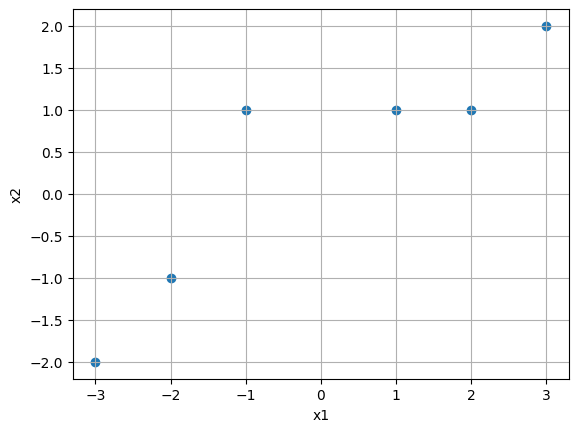

In [7]:
# featurne space 에서 데이터 분포

plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()


In [8]:
# 비지도 학습(pc score) >> fit_transform()
z = pca.transform(x)
z

array([[ 0.50917706,  1.08866118],
       [ 2.40151069, -0.10258752],
       [ 3.7751606 , -0.43887001],
       [-1.20075534,  0.05129376],
       [-2.05572155, -0.46738995],
       [-3.42937146, -0.13110746]])

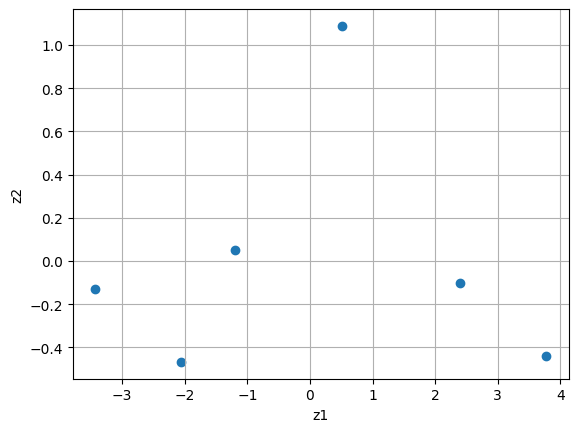

In [9]:
#feature score 에서 pca 값(변환) 분포
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()

#z1(pc1) 이 z2(pc2)보다 더 큰 variance 가지고 있음

In [10]:
#PC loading 벡터

phi = pca.components_
phi

#주성분 : 데이터의 변동성(variance) 설명하는 직교(pc1, pc2)
#phi 결과 >> 주성분 행렬(각 행: 각 주성분, 각 열: feature에 대한 주성분의 가중치)

array([[-0.8549662 , -0.51868371],
       [-0.51868371,  0.8549662 ]])

feature는 변수

In [11]:
phi[0]
# 첫번째 주성분(pc1)의 가중치 벡터
#-0.8549662 (첫번째 feature에 대한 가중치) -0.51868371(두번째 feature에 대한 가중치)
# >> 각 feature는 음(-)의 가중치 가짐 , 첫번째 feature가 더 큰 영향을 미칩니다.



array([-0.8549662 , -0.51868371])

In [12]:
phi[1]
# 두번째 주성분(pc2)의 가중치 벡터
#-0.51868371 (첫번째 feature에 대한 가중치) 0.8549662(두번째 feature에 대한 가중치)
# >> 두번째 feature는 양(+)의 가중치를 가지며 더 큰 영향력을 가집니다.

array([-0.51868371,  0.8549662 ])

In [13]:
print(x)
print(phi.T)

[[-1  1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[-0.8549662  -0.51868371]
 [-0.51868371  0.8549662 ]]


In [14]:
# 머신러닝 13주차 p18

np.matmul(x, phi.T)
# pca 수행 후, 주성분으로 데이터변환
# 원본 데이터 x >> 주성분 공간(phi)으로 투사(정사영)하여 차원을 축소
# 새로운 주성분 좌표를 얻음

# 결과 해석
# [ 0.33628249,  1.37364991] >> 원본 데이터 x의 첫번째 행 [-1, 1]값이 주성분 공간 phi로 변환된 좌표

array([[ 0.33628249,  1.37364991],
       [ 2.22861612,  0.18240122],
       [ 3.60226603, -0.15388128],
       [-1.37364991,  0.33628249],
       [-2.22861612, -0.18240122],
       [-3.60226603,  0.15388128]])

In [15]:
pca.explained_variance_ratio_

array([0.95864607, 0.04135393])

In [16]:
iris = load_iris()

#x, y 분리
x_iris, y_iris = iris.data, iris.target

In [23]:
pca = PCA(n_components=3)

z = pca.fit_transform(x_iris)

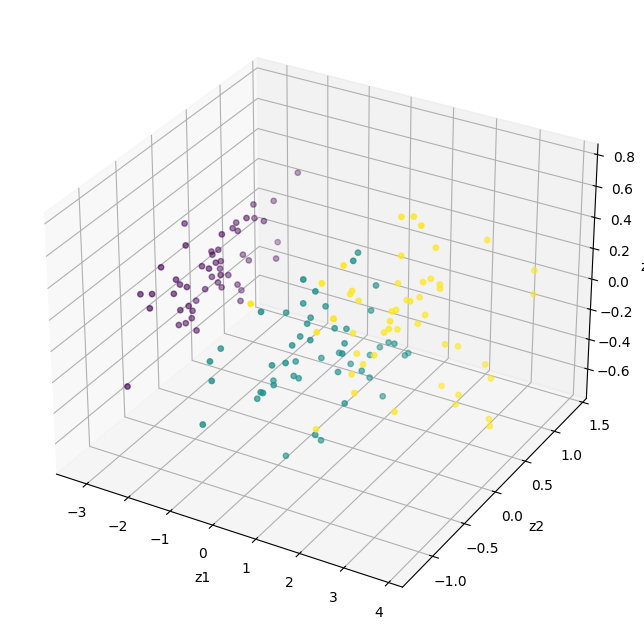

In [24]:
#PC space 에서의 데이터 분포 파악

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(z[:, 0], z[:, 1], z[:, 2], c=y_iris, s =15)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
plt.show()

In [25]:
#pc loading vector
phi = pca.components_


In [30]:
phi.shape

(3, 4)

In [31]:
phi.T.shape

(4, 3)

In [33]:
x_iris.shape

(150, 4)

In [32]:
np.matmul(x_iris, phi.T).shape # (150,4) X (4,3) = (150,3)

(150, 3)

In [34]:
np.matmul(x_iris, phi.T)[:3]

array([[ 2.81823951,  5.64634982, -0.65976754],
       [ 2.78822345,  5.14995135, -0.84231699],
       [ 2.61337456,  5.18200315, -0.61395246]])

In [35]:
# (**) 설명된 분산

pca.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261])

In [37]:
#2개의 주성분으로 97%를 설명하네

pca = PCA(n_components=2)
z = pca.fit_transform(x_iris)
z

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

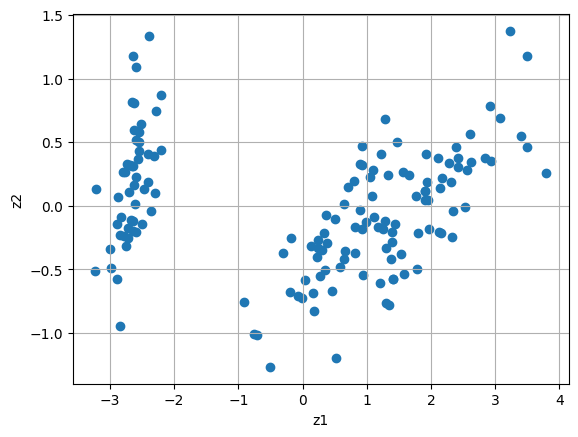

In [38]:
#feature score 에서 pca 값(변환) 분포
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()

Kmeans clustering 간단한 예제

In [39]:
x = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

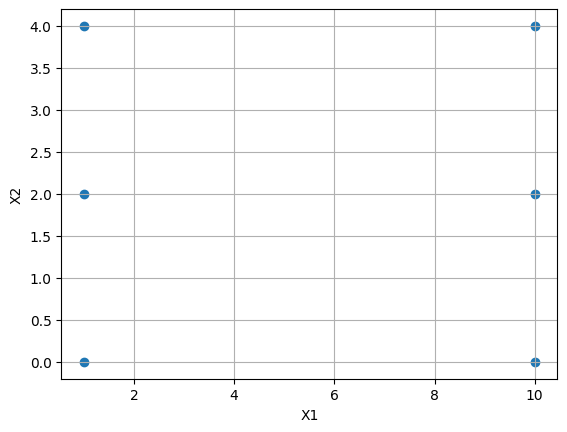

In [40]:
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

In [41]:
# 적합 (fitting)

kmeans = KMeans(n_clusters=2, random_state=42).fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
#각각의 데이터가 어느 클러스터에 포함되어 있는지 표시
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

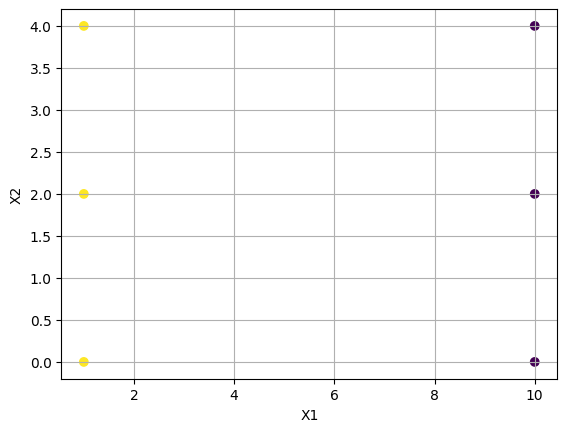

In [44]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

KMeans clustering 예제 (iris data)

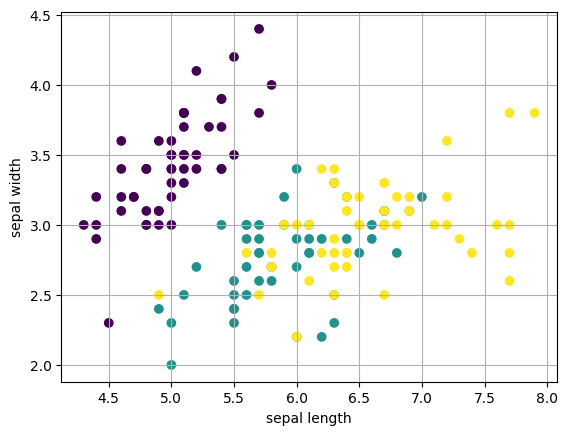

In [48]:
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()

In [49]:
#적합 (fitting)
kmeans = KMeans(n_clusters=2, random_state=42).fit(x_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

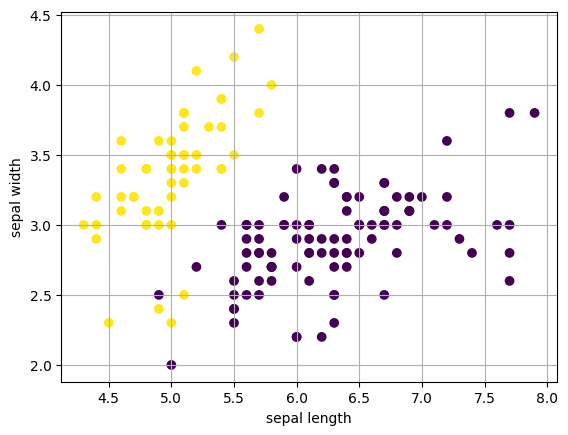

In [53]:
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=kmeans.labels_)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()